In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt


In [10]:
import io
import sys

dfs = {}

if os.path.exists('stats.txt'):
    os.remove('stats.txt')

with open('stats.txt', 'w') as log_file:
    for file in os.listdir():
        if file.endswith('.csv'):
            df = pd.read_csv(file)
            print(f"Processing {file}...")
            dfs[file] = df

            # Write file name as header
            log_file.write(f"=== Analysis for {file} ===\n\n")
            
            # Write head()
            log_file.write("HEAD (First 5 rows):\n")
            log_file.write(df.head().to_string())
            log_file.write("\n\n")
            
            # Write describe()
            log_file.write("DESCRIBE (Statistical Summary):\n")
            log_file.write(df.describe().to_string())
            log_file.write("\n\n")
            
            # Write info() - capture the output using StringIO
            log_file.write("INFO (Data types and memory usage):\n")
            buffer = io.StringIO()
            df.info(buf=buffer)
            log_file.write(buffer.getvalue())
            log_file.write("\n")
            
            # Write missing values
            log_file.write(f"MISSING VALUES:\n")
            log_file.write(df.isnull().sum().to_string())
            log_file.write("\n\n")

            
            log_file.write("\n\n" + "="*60 + "\n\n")

print(f"Analysis complete! Data from {len(dfs)} files stored in dfs dictionary.")
print("Statistics written to stats.txt")

Processing billing.csv...
Processing users.csv...
Processing users.csv...
Processing events.csv...
Processing events.csv...
Processing sessions.csv...
Analysis complete! Data from 4 files stored in dfs dictionary.
Statistics written to stats.txt
Processing sessions.csv...
Analysis complete! Data from 4 files stored in dfs dictionary.
Statistics written to stats.txt


### By analysing the stats.txt, 4935 rows of app_version missing in session.csv, 38224 rows of region missing in users.csv, see if we could retrieve these missing values by matching with user_id or just not important ig.                  

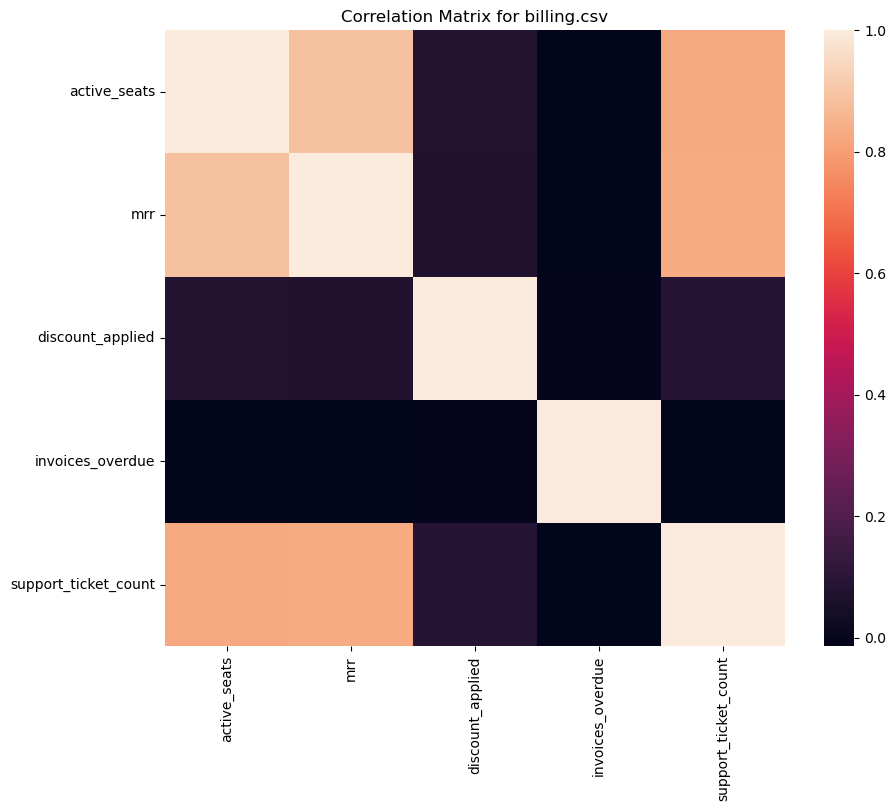

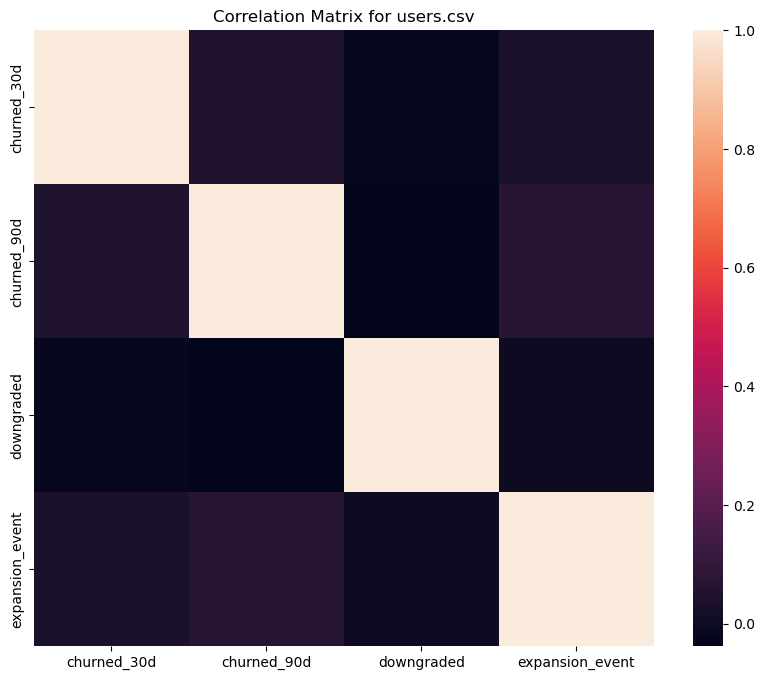

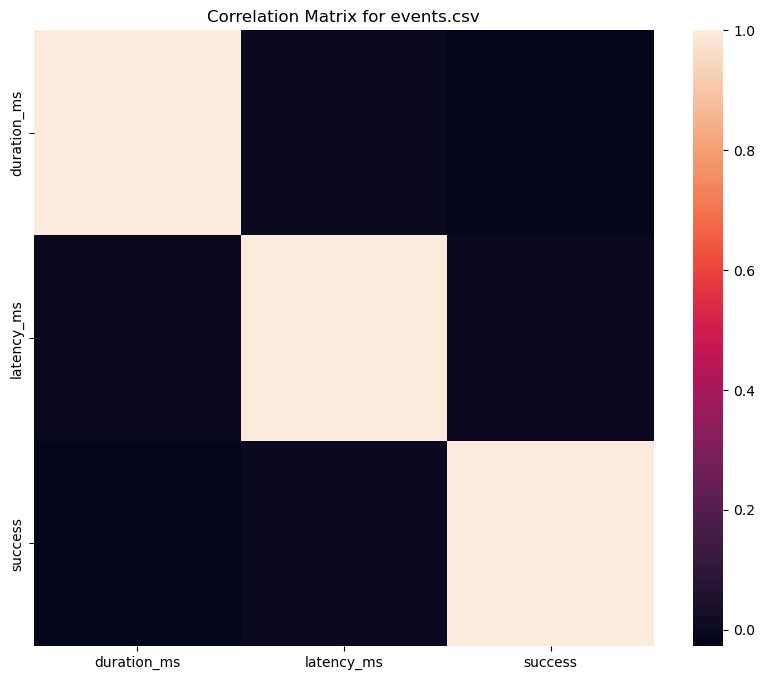

'sessions.csv' has only one numeric column, so no correlation matrix can be generated.


In [15]:
# Generate and display correlation heatmaps for each dataframe

for filename, df in dfs.items():
    # Select only numeric columns for correlation
    numeric_cols = df.select_dtypes(include=['number'])
    
    # Ensure there is more than one numeric column to create a matrix
    if not numeric_cols.empty and len(numeric_cols.columns) > 1:
        plt.figure(figsize=(10, 8))
        sns.heatmap(numeric_cols.corr())
        plt.title(f'Correlation Matrix for {filename}')
        plt.show()
    elif not numeric_cols.empty:
        print(f"'{filename}' has only one numeric column, so no correlation matrix can be generated.")
    else:
        print(f"'{filename}' has no numeric columns to plot a correlation matrix.")

### billing.csv: mrr, active _seats, support_ticket_count are correlated (see them as one group).

--- Analysis for billing.csv ---

'user_id' has 100000 unique values (too many to display).

Distinct values in 'month':
['2024-05' '2024-06' '2024-07' '2024-08' '2024-09' '2024-10' '2024-11'
 '2024-12' '2025-01' '2025-02' '2025-03' '2025-04' '2025-05' '2025-06'
 '2025-07' '2024-04' '2024-02' '2024-03']

Distinct values in 'plan_tier':
['free' 'standard' 'premium']

--- Generating Box Plots ---
Skipping box plots for 'user_id' due to too many unique values.
Skipping box plots for 'month' due to too many unique values.

'user_id' has 100000 unique values (too many to display).

Distinct values in 'month':
['2024-05' '2024-06' '2024-07' '2024-08' '2024-09' '2024-10' '2024-11'
 '2024-12' '2025-01' '2025-02' '2025-03' '2025-04' '2025-05' '2025-06'
 '2025-07' '2024-04' '2024-02' '2024-03']

Distinct values in 'plan_tier':
['free' 'standard' 'premium']

--- Generating Box Plots ---
Skipping box plots for 'user_id' due to too many unique values.
Skipping box plots for 'month' due to too many 

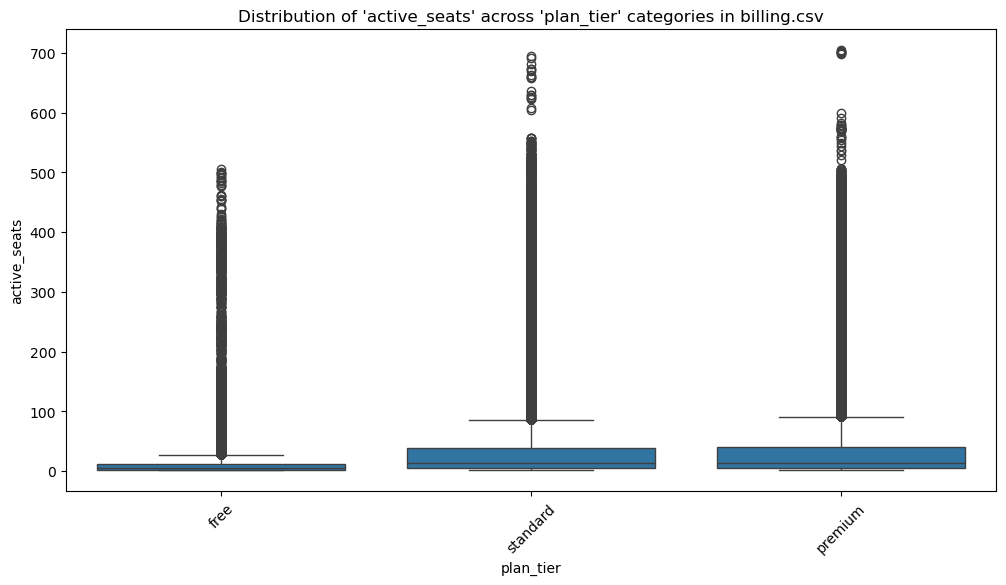

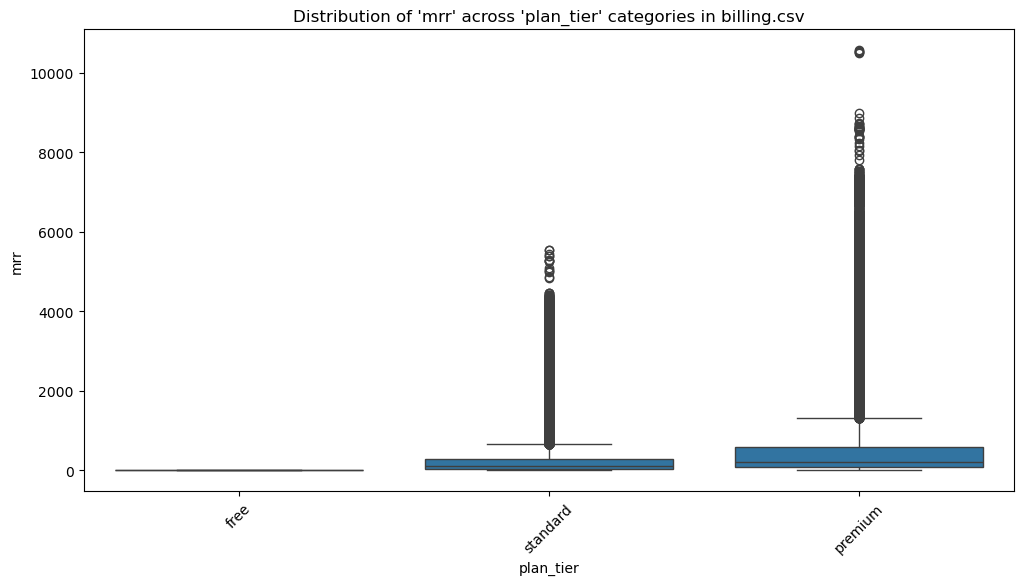

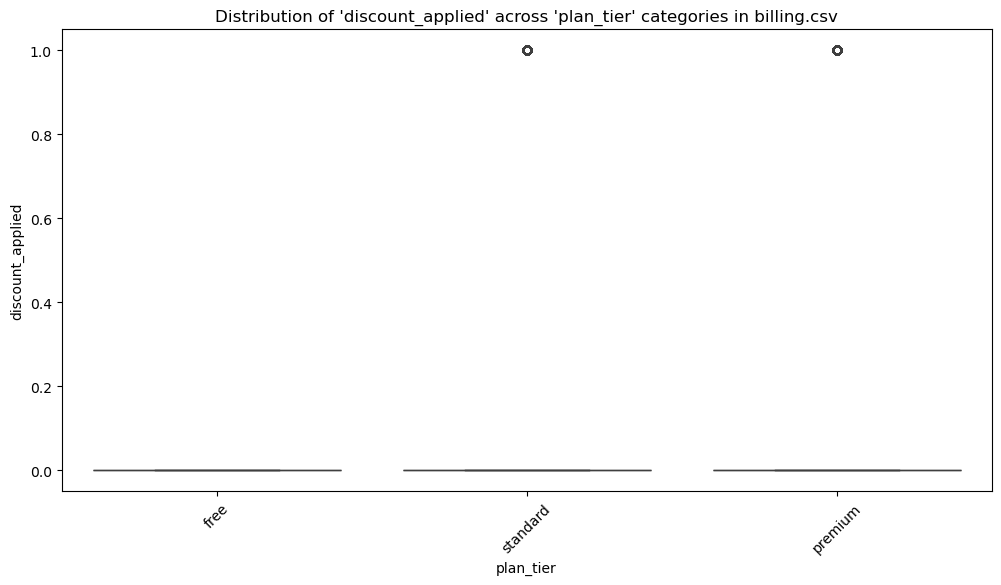

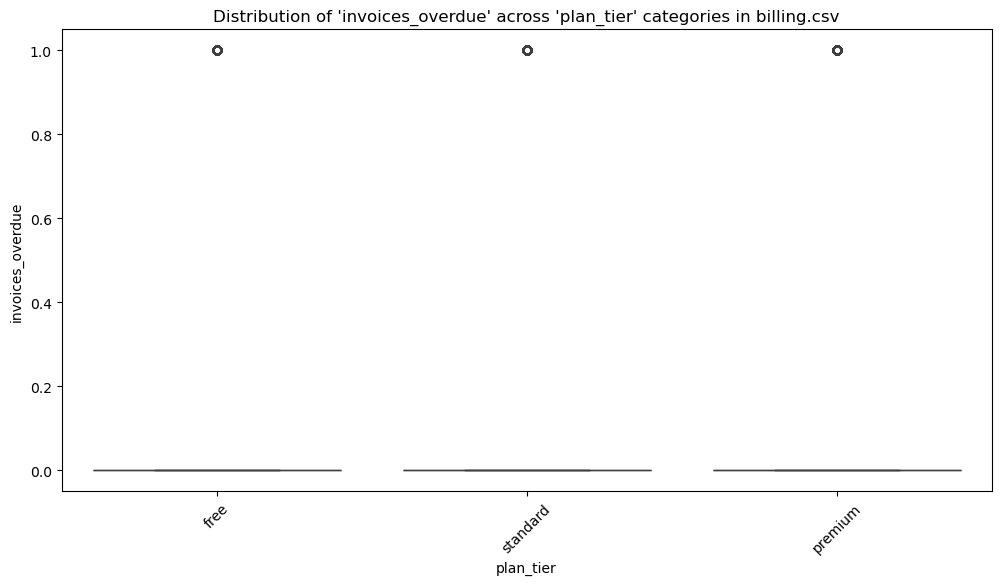

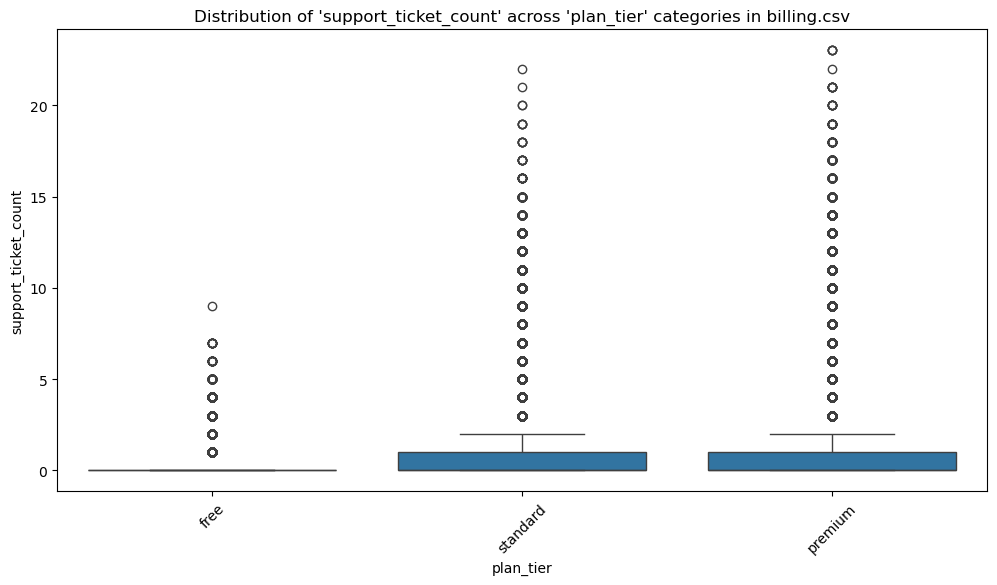

-------------------------------
--- Analysis for users.csv ---

'user_id' has 100000 unique values (too many to display).

'signup_date' has 516 unique values (too many to display).

Distinct values in 'plan_tier':
['free' 'standard' 'premium']

Distinct values in 'company_size':
['11-50' '1-10' '200+' '51-200']

Distinct values in 'region':
['EU' nan 'APAC' 'LATAM']

Distinct values in 'industry':
['software' 'education' 'transport' 'energy' 'retail' 'finance'
 'healthcare' 'telecom' 'media' 'manufacturing']

Distinct values in 'acquisition_channel':
['seo' 'partner' 'ads' 'outbound']

--- Generating Box Plots ---
Skipping box plots for 'user_id' due to too many unique values.
Skipping box plots for 'signup_date' due to too many unique values.


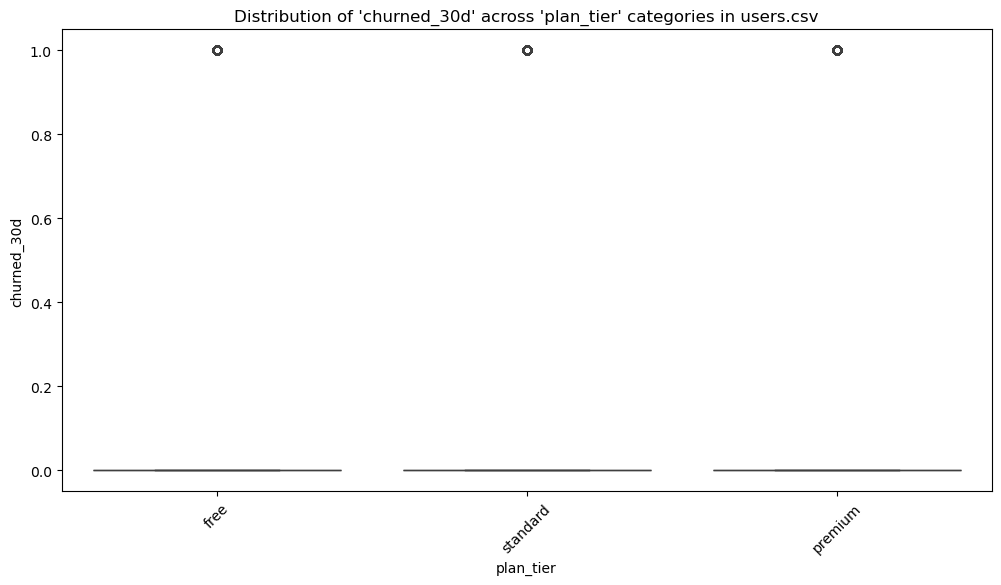

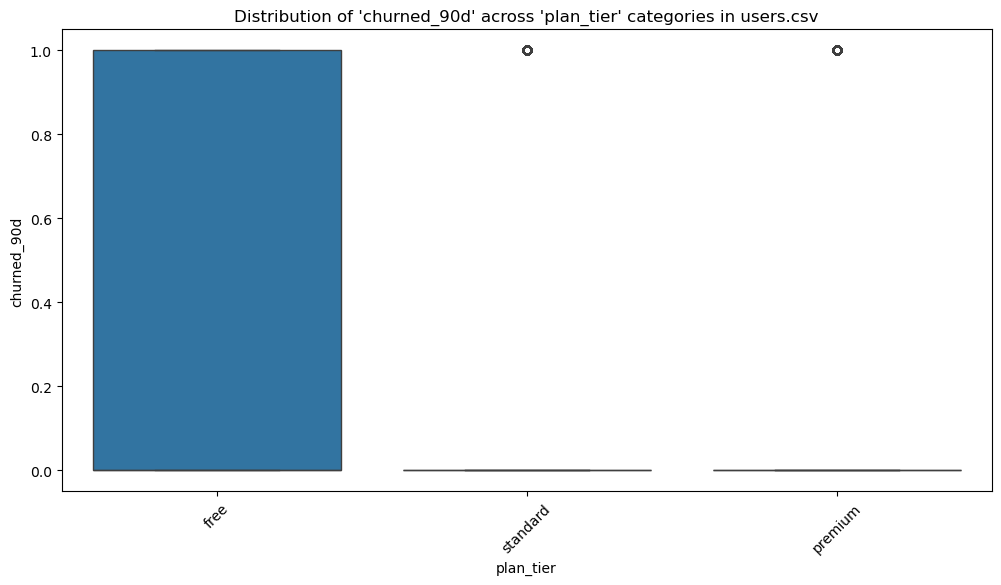

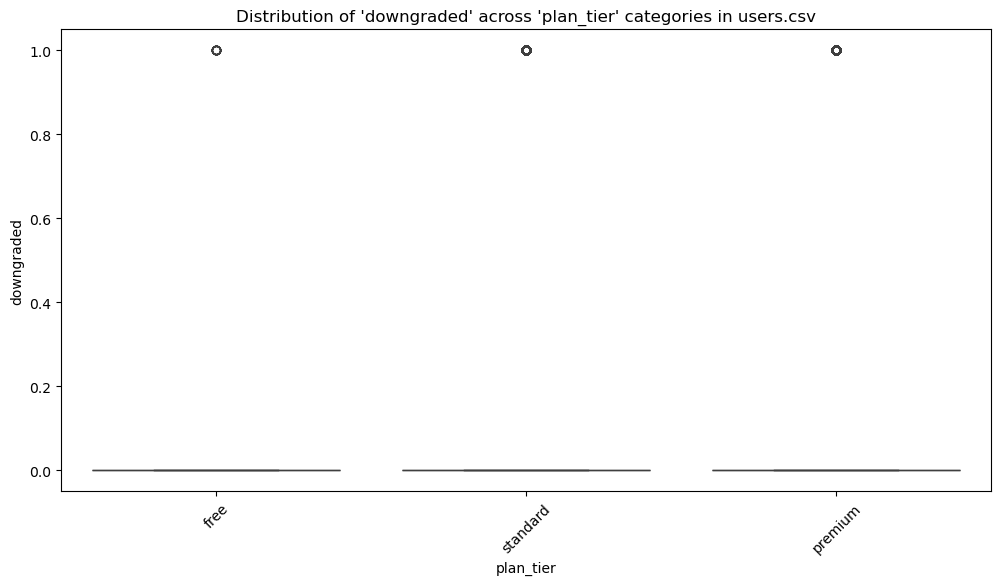

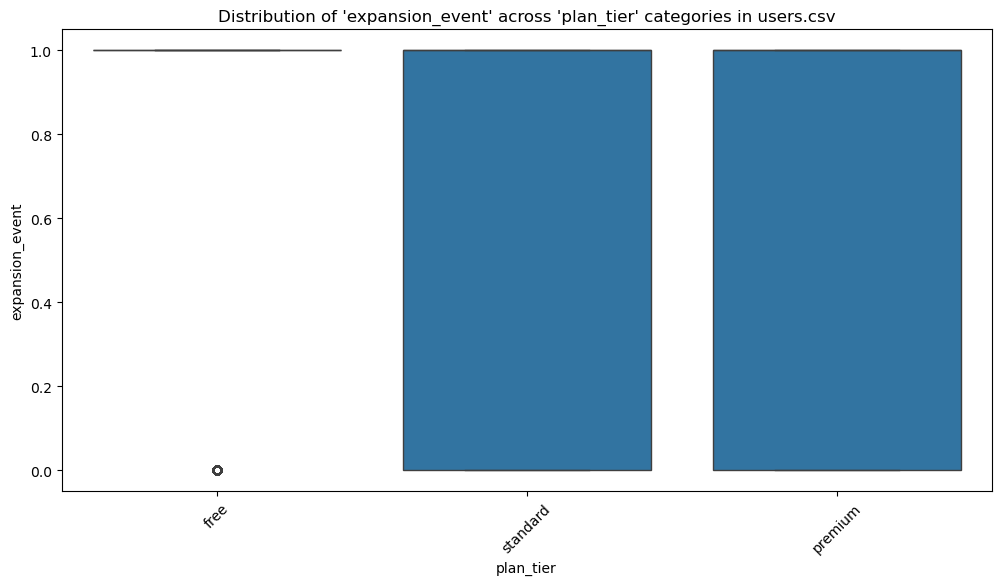

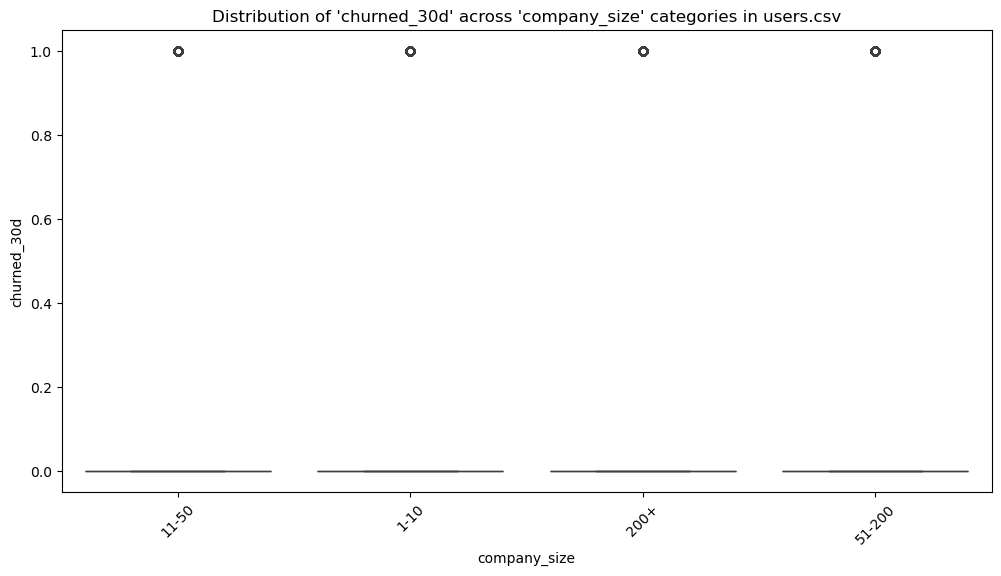

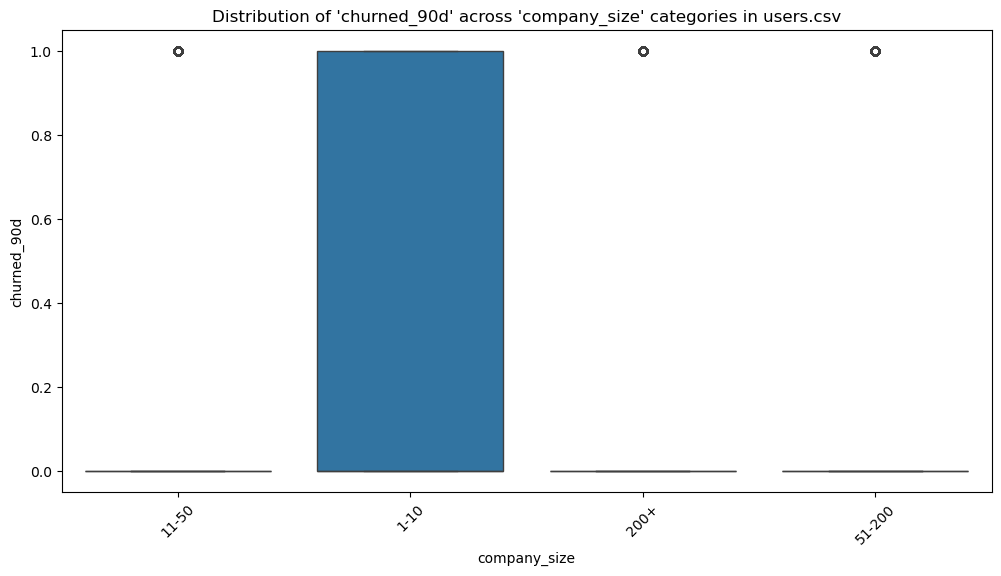

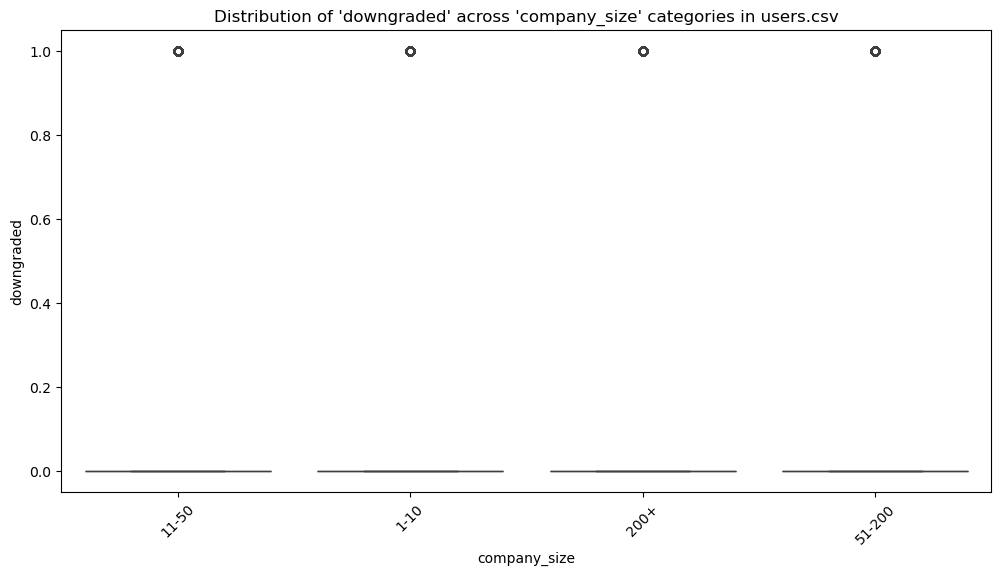

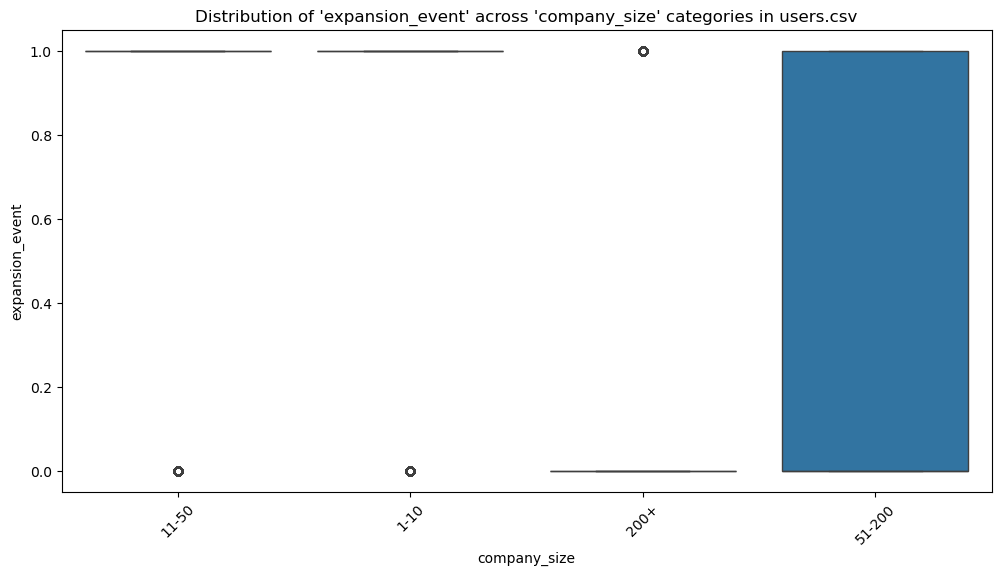

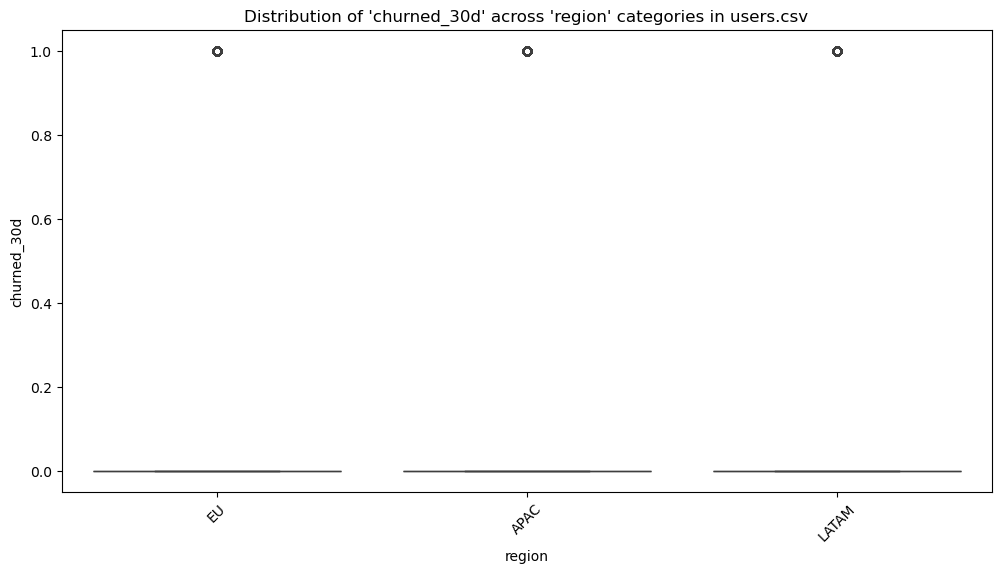

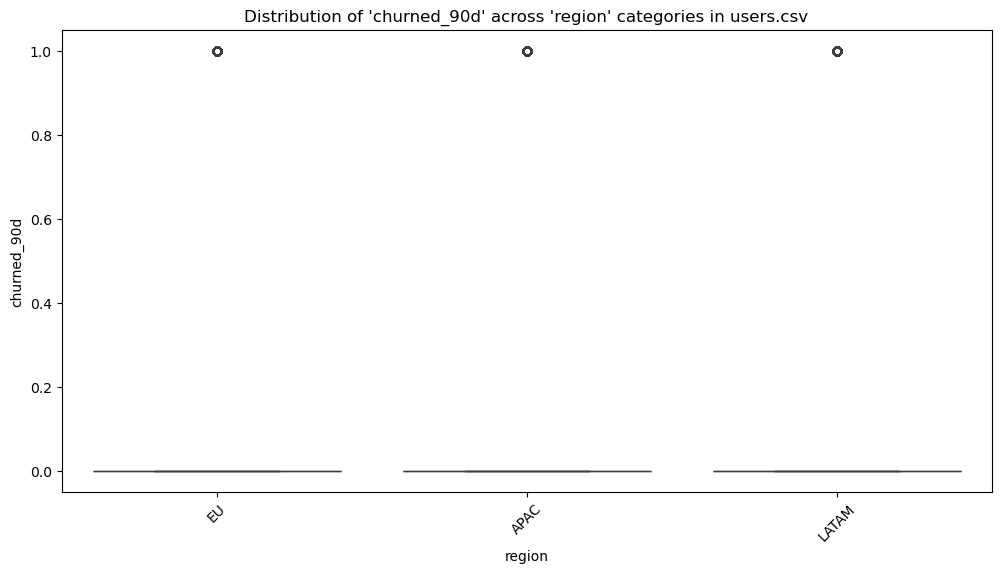

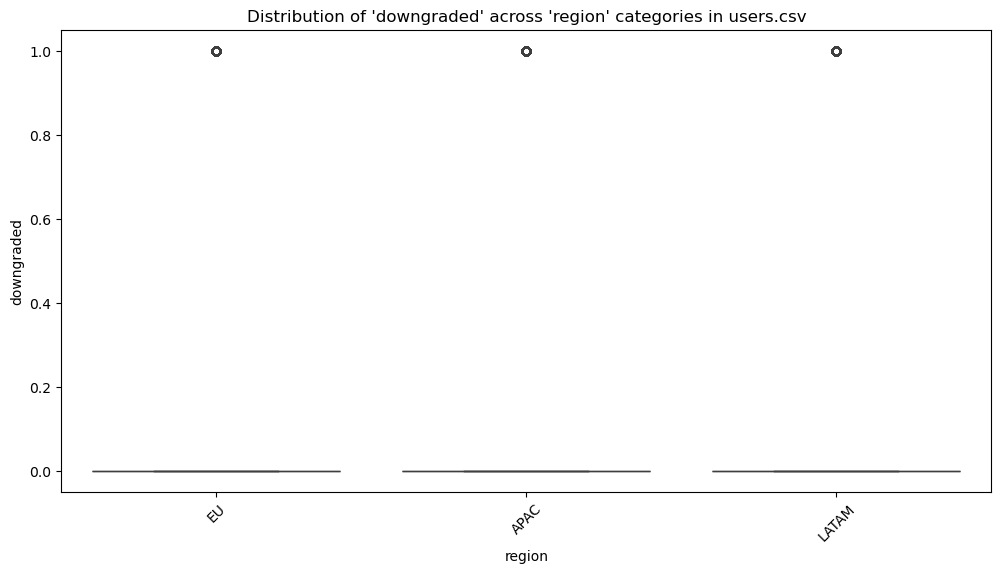

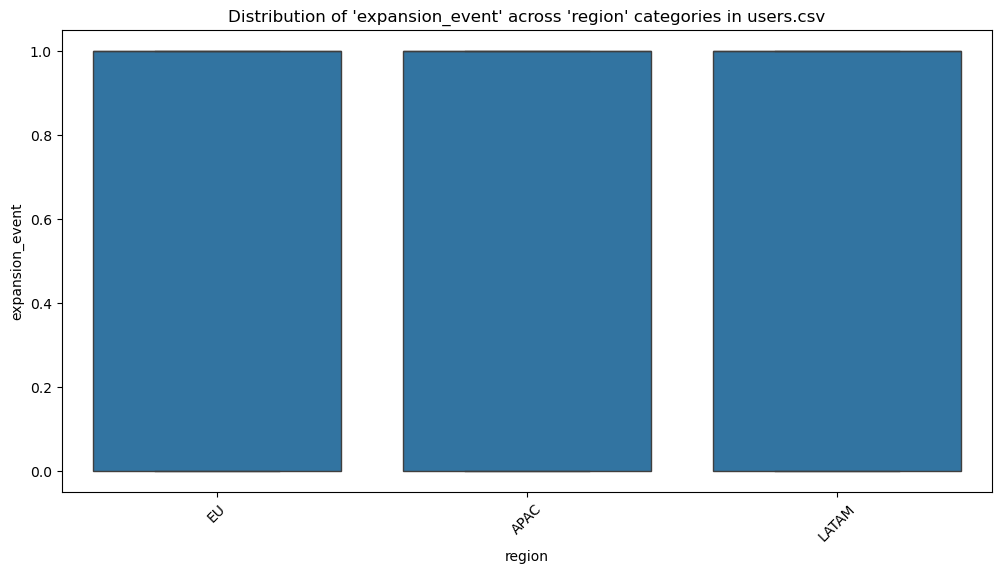

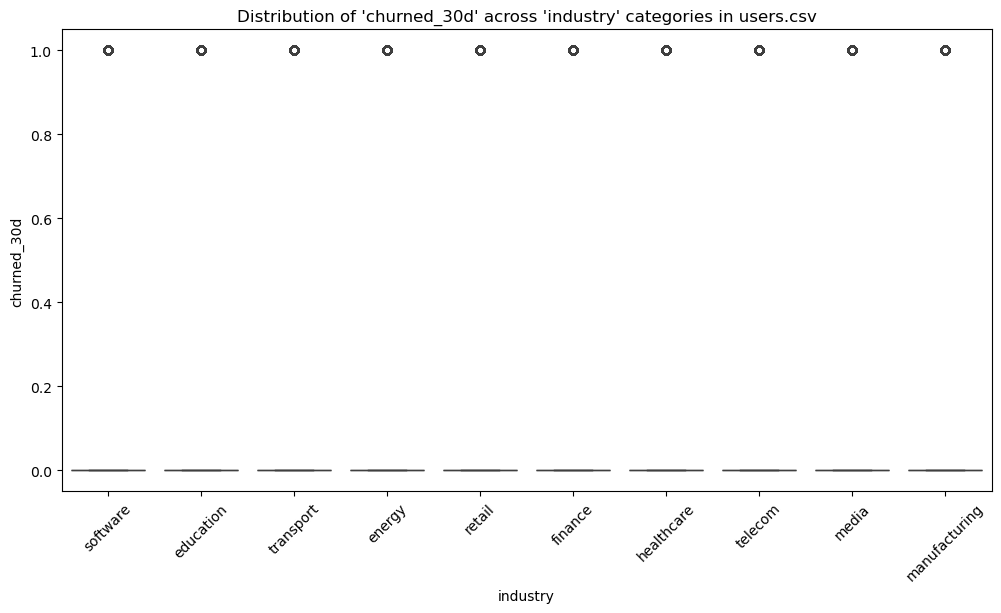

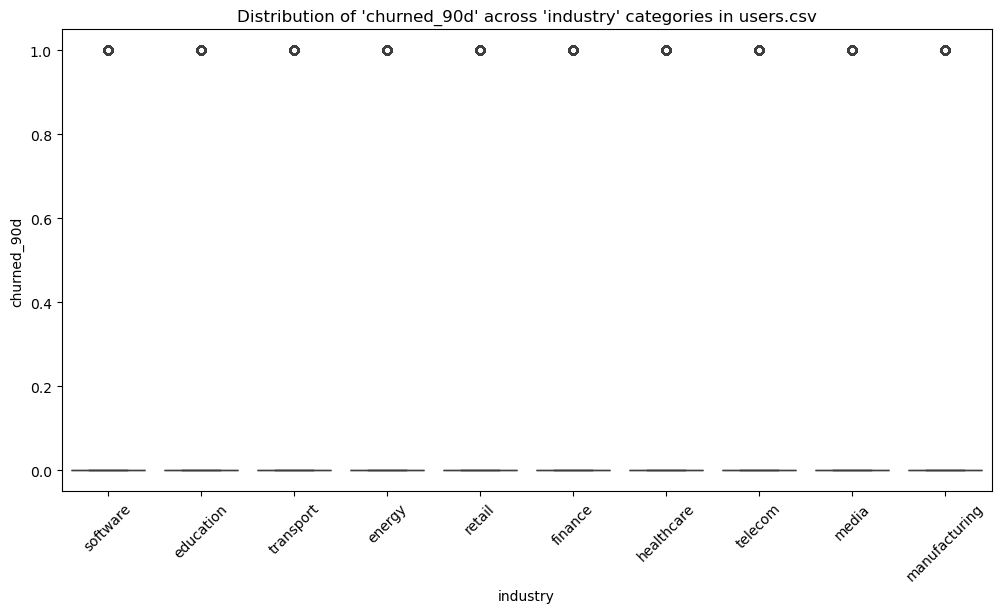

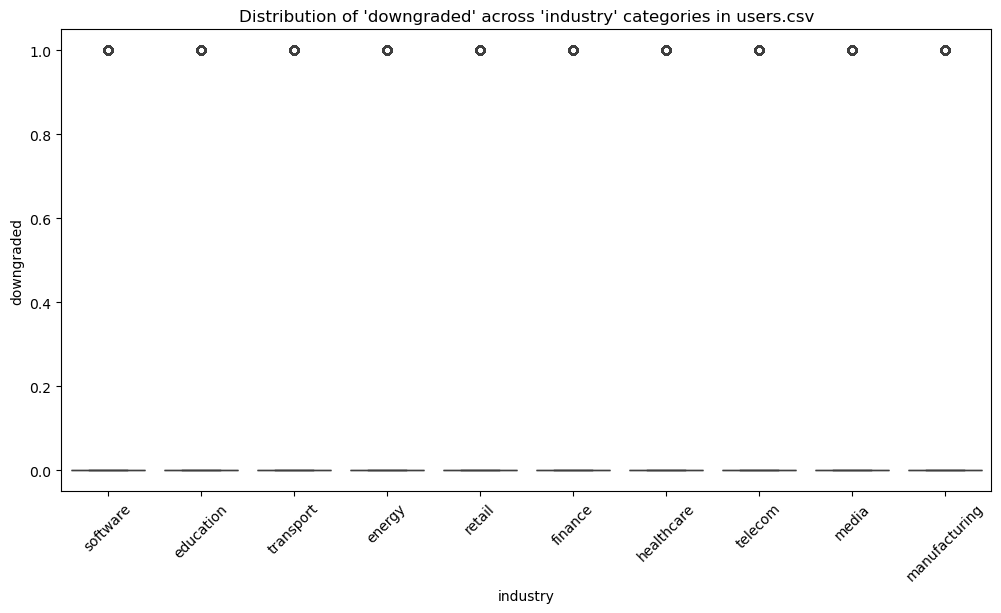

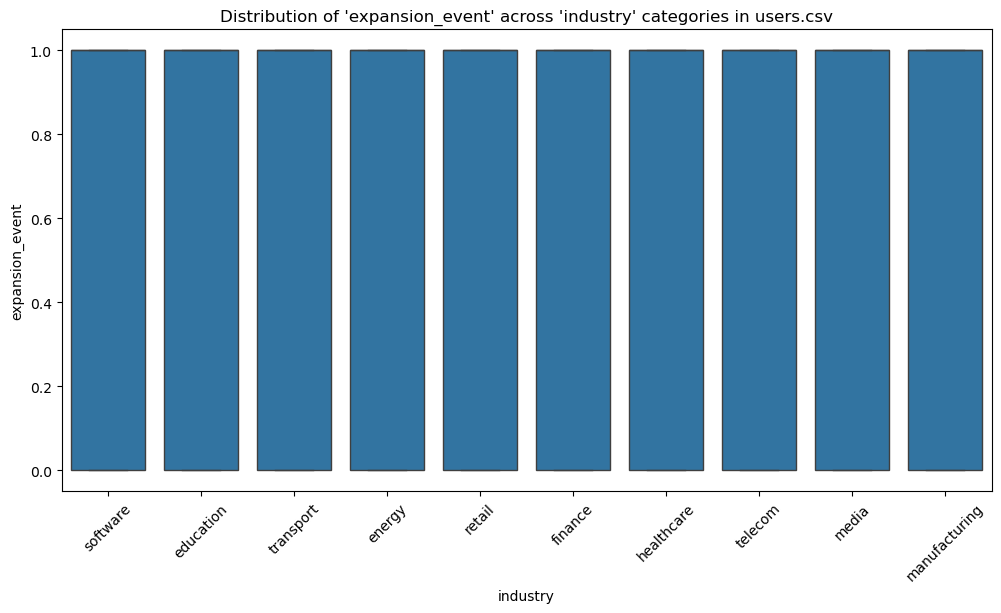

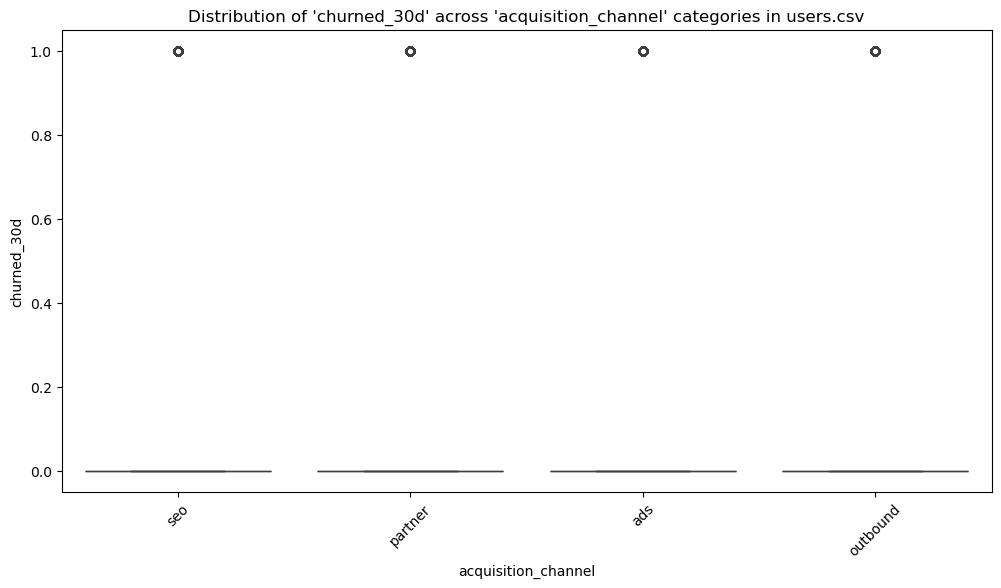

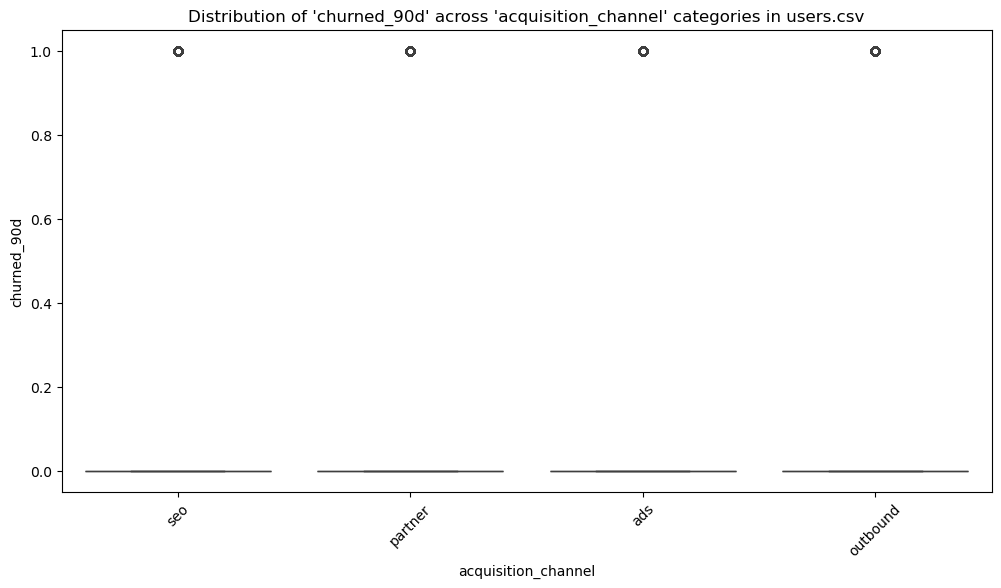

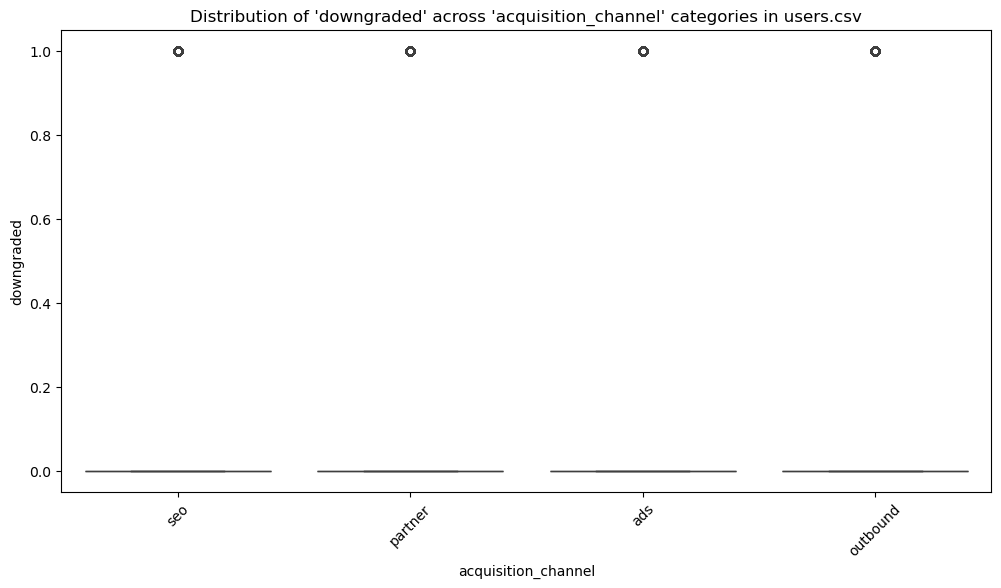

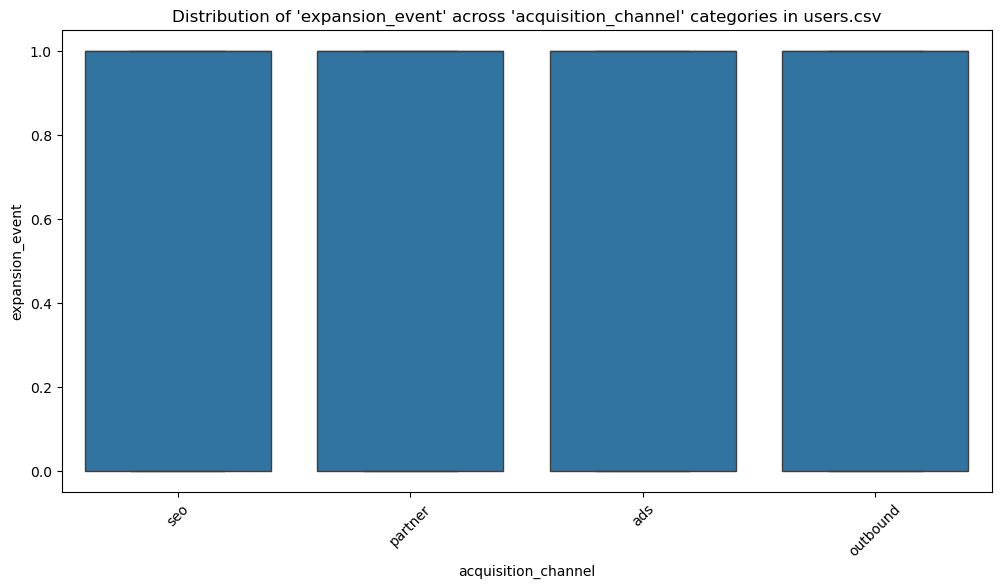

-----------------------------
--- Analysis for events.csv ---

'event_id' has 234329 unique values (too many to display).

'user_id' has 57312 unique values (too many to display).

'session_id' has 170198 unique values (too many to display).

'ts' has 234329 unique values (too many to display).

Distinct values in 'feature_name':
['jira_board' 'jira_automation' 'team_invite' 'bitbucket_integration'
 'confluence_page' 'confluence_ai_assist' 'trello_export_csv']

Distinct values in 'action':
['view' 'click' 'complete']

--- Generating Box Plots ---
Skipping box plots for 'event_id' due to too many unique values.
Skipping box plots for 'user_id' due to too many unique values.
Skipping box plots for 'session_id' due to too many unique values.
Skipping box plots for 'ts' due to too many unique values.

'ts' has 234329 unique values (too many to display).

Distinct values in 'feature_name':
['jira_board' 'jira_automation' 'team_invite' 'bitbucket_integration'
 'confluence_page' 'confluence_a

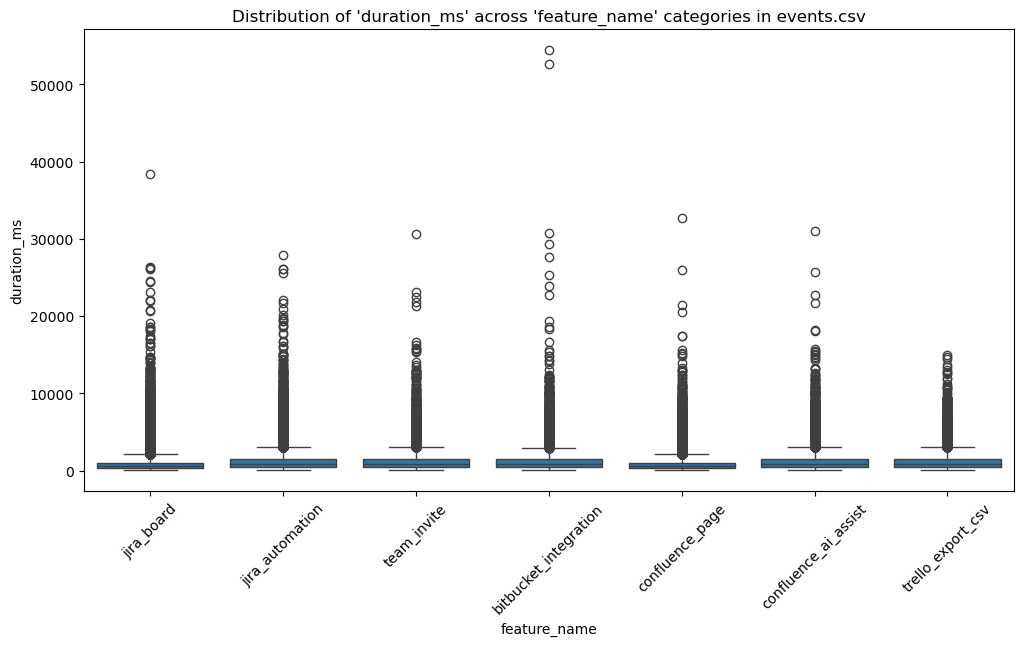

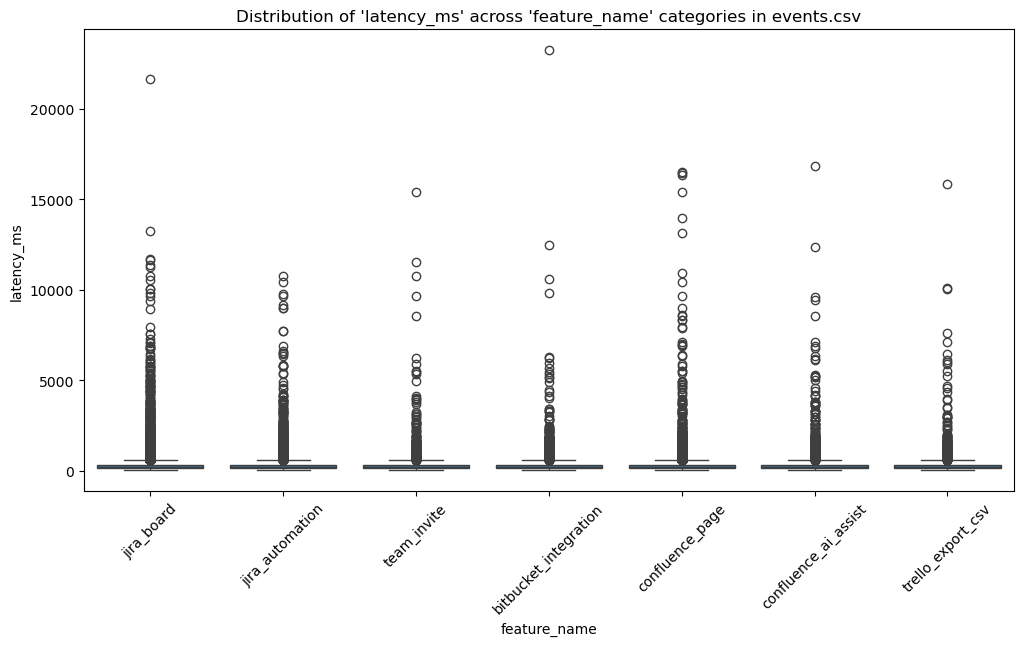

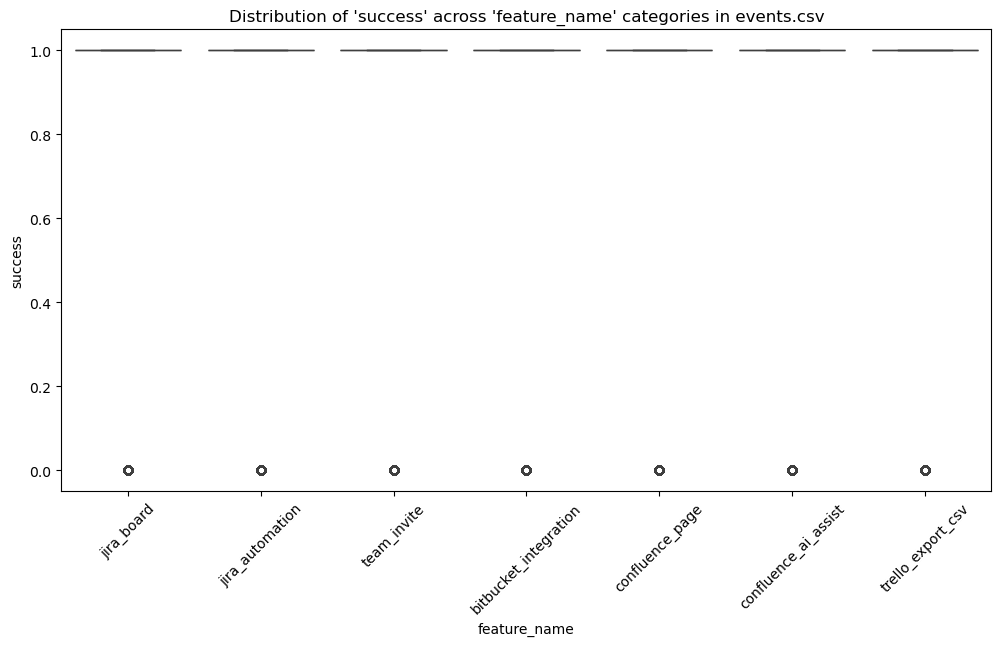

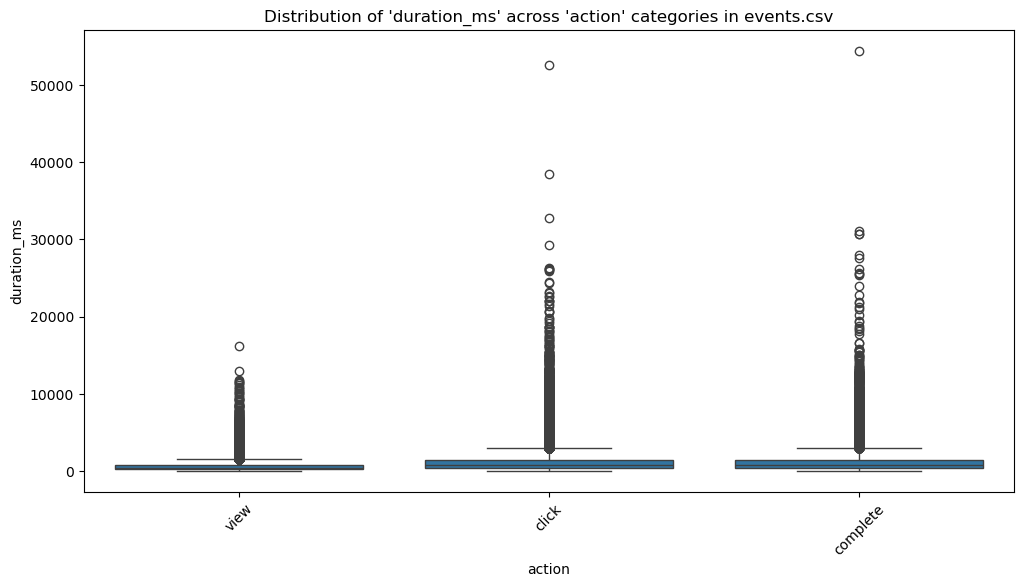

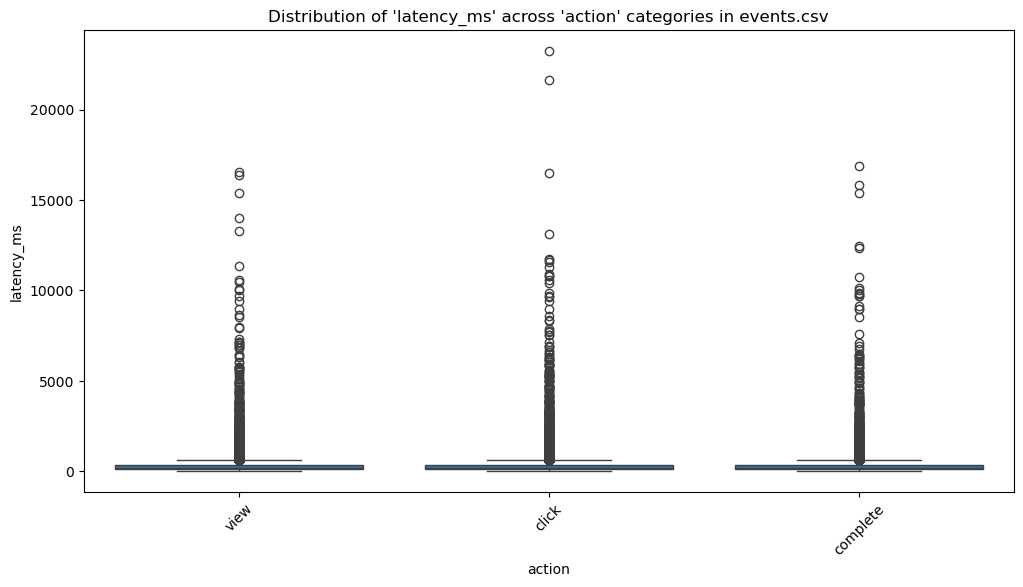

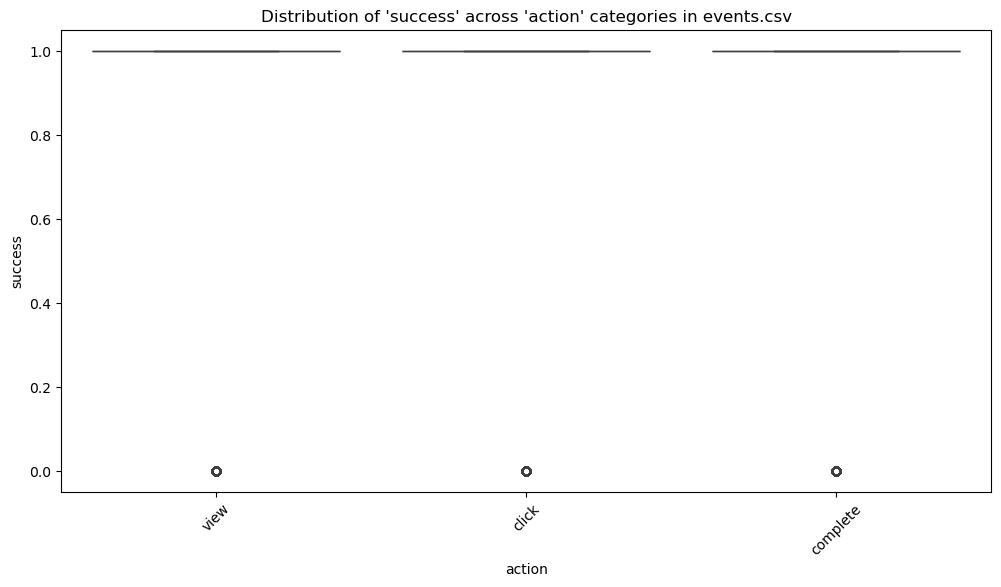

------------------------------
--- Analysis for sessions.csv ---

'session_id' has 336717 unique values (too many to display).

'user_id' has 71533 unique values (too many to display).

'session_start' has 336714 unique values (too many to display).

'session_end' has 336717 unique values (too many to display).

'user_id' has 71533 unique values (too many to display).

'session_start' has 336714 unique values (too many to display).

'session_end' has 336717 unique values (too many to display).

Distinct values in 'device':
['web' 'mobile' 'desktop']

Distinct values in 'os':
['win' 'linux' 'ios' 'android' 'mac']

'app_version' has 60 unique values (too many to display).

Distinct values in 'country':
['AU' 'SG' 'NZ' 'JP' 'IN' 'US' 'NL' 'ES' 'CA' 'BR' 'CL' 'AR' 'SE' 'FR'
 'DE' 'CO' 'MX']

--- Generating Box Plots ---
Skipping box plots for 'session_id' due to too many unique values.
Skipping box plots for 'user_id' due to too many unique values.
Skipping box plots for 'session_start' du

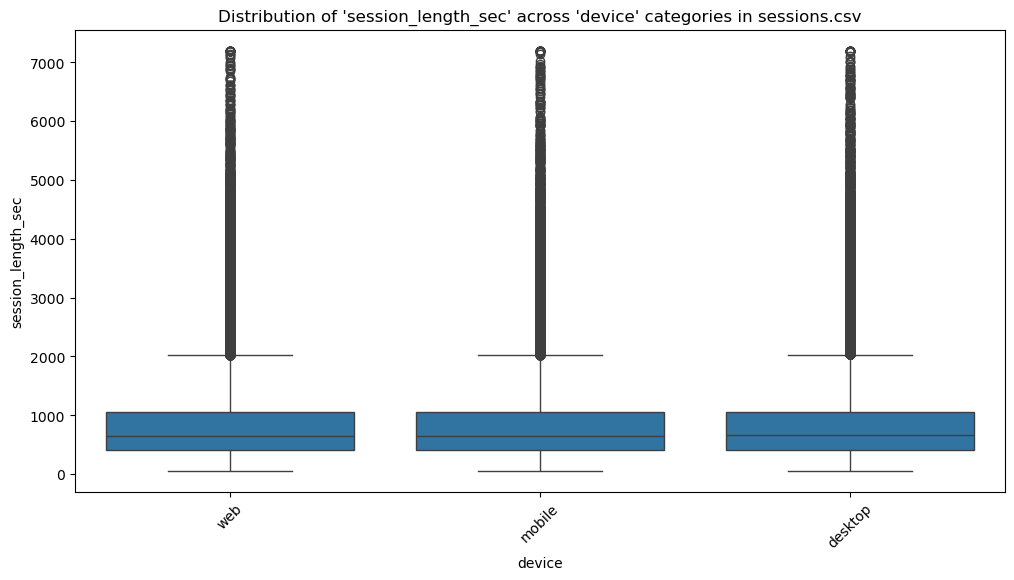

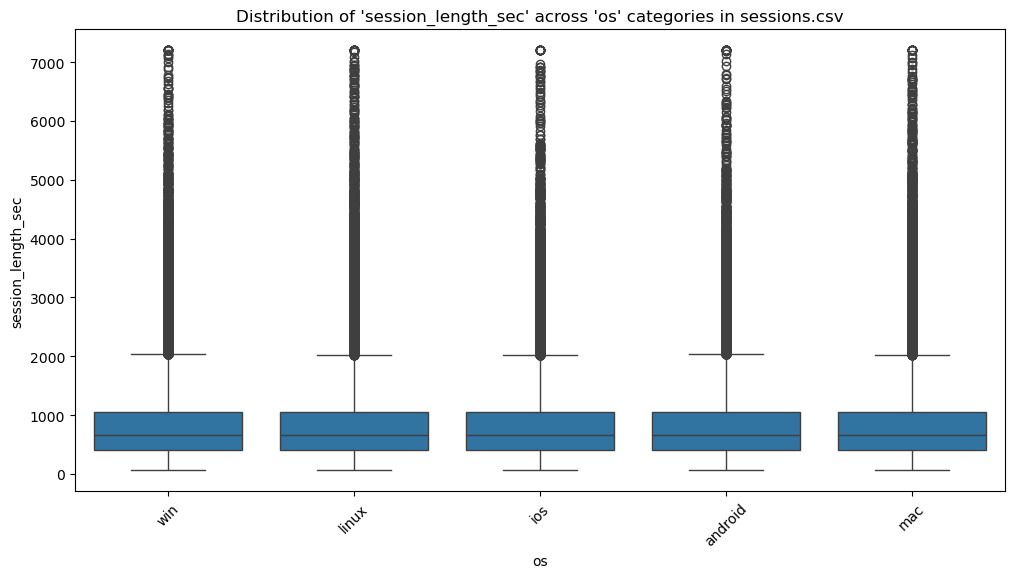

Skipping box plots for 'app_version' due to too many unique values.
Skipping box plots for 'country' due to too many unique values.
--------------------------------


In [16]:
for filename, df in dfs.items():
    print(f"--- Analysis for {filename} ---")
    
    # Identify categorical and numerical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    numerical_cols = df.select_dtypes(include=['number']).columns
    
    # --- 1. Print Distinct Values of Categorical Columns ---
    for col in categorical_cols:
        # To avoid printing too many unique values, we'll cap it at 20
        if df[col].nunique() <= 20:
            print(f"\nDistinct values in '{col}':")
            print(df[col].unique())
        else:
            print(f"\n'{col}' has {df[col].nunique()} unique values (too many to display).")

    # --- 2. Generate Box Plots for Categorical vs. Numerical ---
    if len(categorical_cols) > 0 and len(numerical_cols) > 0:
        print("\n--- Generating Box Plots ---")
        for cat_col in categorical_cols:
            # Again, cap the number of categories to plot for readability
            if df[cat_col].nunique() <= 15:
                for num_col in numerical_cols:
                    plt.figure(figsize=(12, 6))
                    sns.boxplot(data=df, x=cat_col, y=num_col)
                    plt.title(f"Distribution of '{num_col}' across '{cat_col}' categories in {filename}")
                    plt.xticks(rotation=45)
                    plt.show()
            else:
                print(f"Skipping box plots for '{cat_col}' due to too many unique values.")
    
    print("-"*(len(filename) + 20))